<a href="https://colab.research.google.com/github/nucontreras/artificial-intelligence-scripts/blob/main/FSCN/Barras/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
drive_path = "/content/drive/MyDrive/Audios gráficos | IPRE/"
model_path = drive_path + "models/"

import os
models = os.listdir(model_path)
models

['2021-2021-18_15-28-38.h5', 'FSCN1.h5', 'FSCN2.h5', 'FSCN3.h5']

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

m = load_model(model_path + models[0])
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 256, 256, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 256, 256, 64)      36928 

In [ ]:
dir(m)
m.losses

[]

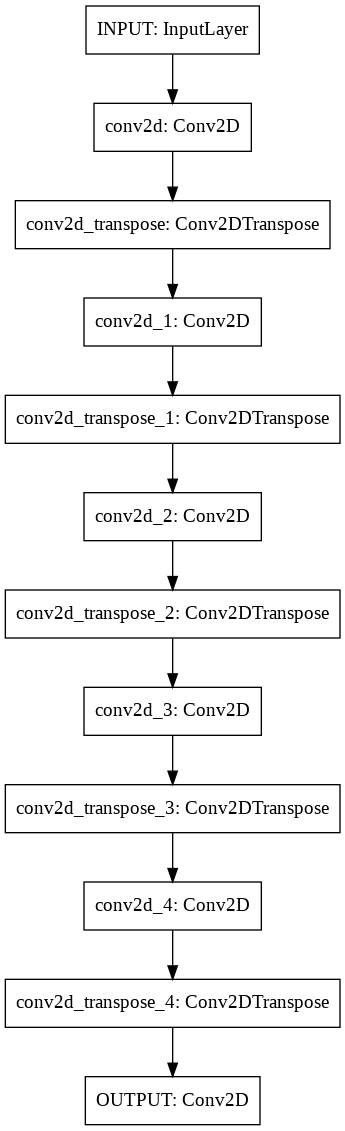

In [ ]:
from keras.utils import plot_model
plot_model(m)

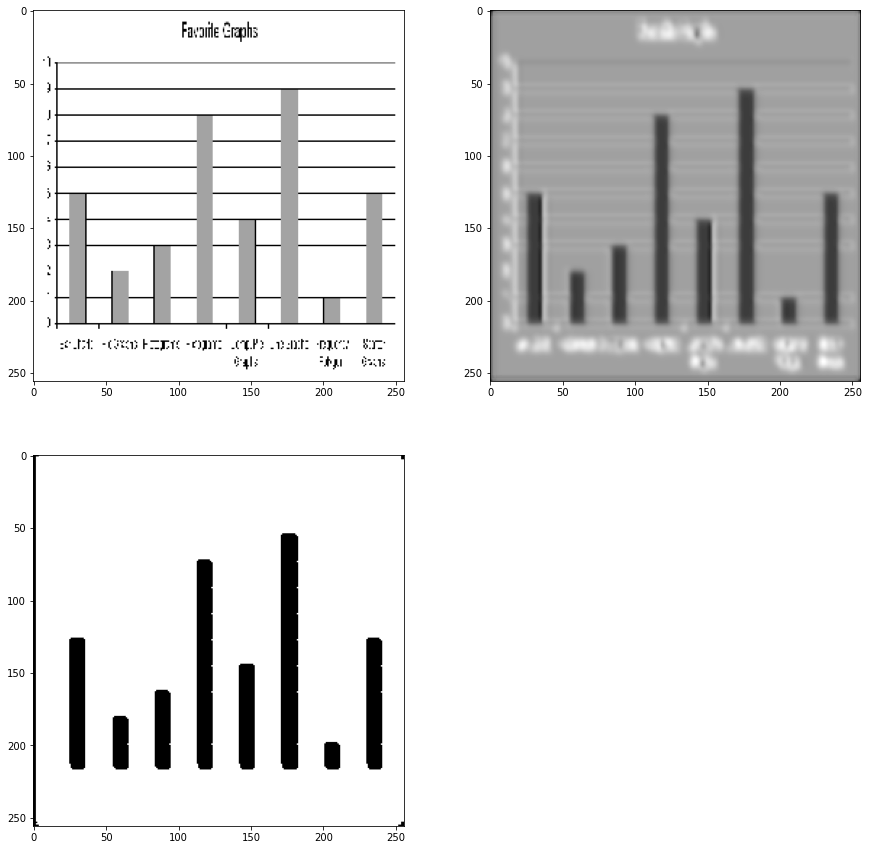

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

def minmax(img):
  img = (img - img.min())/(img.max() - img.min()) #MIN MAX
  return img

def test_model(model, img_path, img_shape, target_path=None):
  # IMG EN NP ARRAY (1, 256, 256, 1)
  # full_img = []
  img = image.load_img(img_path, target_size=(256,256), color_mode = "grayscale") #, interpolation="bicubic")
  img = image.img_to_array(img)
  # img = minmax(img)

  # PREDICCION
  pred = model.predict(img[None,:,:,:]).reshape((256, 256))
  img = img.reshape((256, 256))

  # NORMALIZACIÓN
  # pred = ((pred - pred.min())/(pred.max() - pred.min()))
  # print(pred[0].shape)
  # print(minmax(pred))
  ret, thresh = cv2.threshold(minmax(pred), 0.5, 1, cv2.THRESH_BINARY)

  #DISPLAY
  plt.figure(figsize=(15, 15))
  plt.gray()
  ax = plt.subplot(2,2,1)
  plt.imshow(img)
  ax = plt.subplot(2,2,2)
  plt.imshow(pred)
  ax = plt.subplot(2,2,3)
  plt.imshow(thresh)

  # ax = plt.subplot(2,2,3)
  # plt.imshow(1-new)
  # ax = plt.subplot(2,2,4)
  # plt.imshow(onepixel_img(new))
  if target_path:
    target = image.load_img(target_path, target_size=(256,256), color_mode = "grayscale") #, interpolation="bicubic")
    target = image.img_to_array(target)
    ax = plt.subplot(2,2,4)
    plt.imshow(target[:,:,0])


target_path = None
n = 1
# img_path = drive_path + f"dataset/segmentation-2/test/color/{n}.png"
img_path = drive_path + f"ejemplos/internet/buenos/1000.jpg"
# target_path = drive_path + f"dataset/segmentation-2/test/segmented/{n}.png"

# img_path = drive_path + "DB graficos internet/Barras Verticales/Copia de graph_1003.jpg"
m = load_model(model_path + models[0])

test_model(m, img_path, (256, 256), target_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


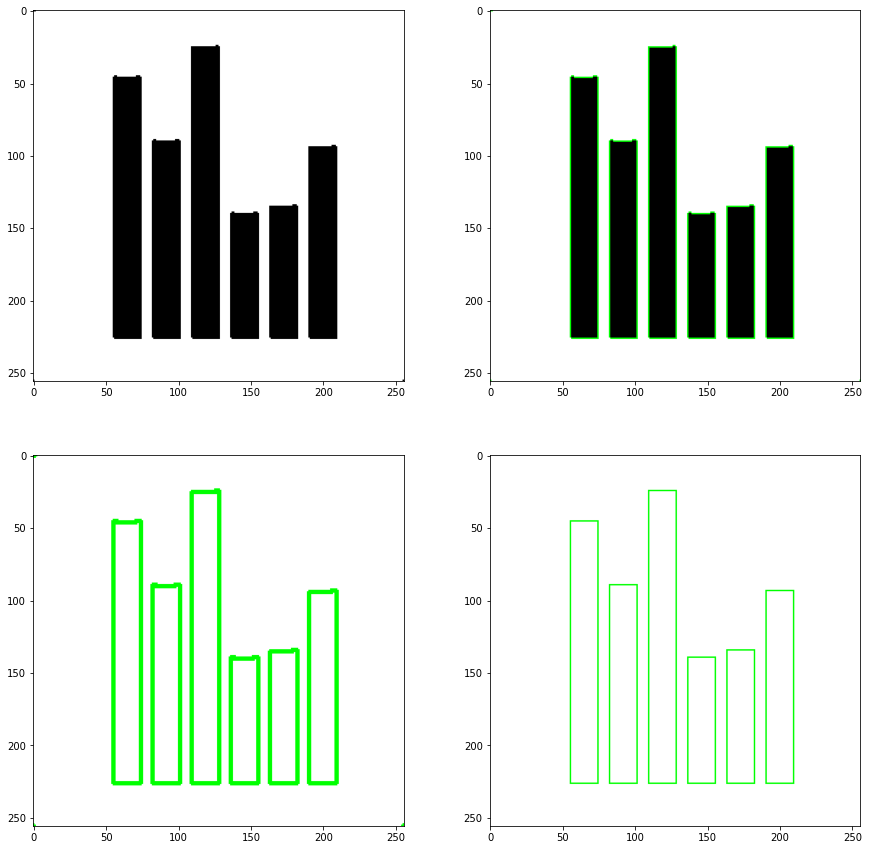

In [ ]:
def segment(img_path, model):
  img = image.load_img(img_path, target_size=(256,256), color_mode = "grayscale") #, interpolation="bicubic")
  img = image.img_to_array(img)

  # PREDICCION
  pred = model.predict(img[None,:,:,:]).reshape((256, 256))
  img = img.reshape((256, 256))

  ret, thresh = cv2.threshold(minmax(pred), 0.5, 1, cv2.THRESH_BINARY)
  return thresh.astype(np.uint8)

  # m = load_model(model_path + models[0])
n = 1016
img_path = drive_path + f"ejemplos/internet/buenos/{n}.jpg"
target_path = drive_path + f"dataset/segmentation-2/test/segmented/{n}.png"

img_path = drive_path + "DB graficos internet/Barras Verticales/Copia de graph_1003.jpg"

# print(segmented.astype(np.uint8).dtype)

segmented = segment(img_path, m)

# Invert de blanco con negro para encontrar los contours
contours, hierarchy = cv2.findContours(np.where((segmented==0), 1, 0).astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(15,15))
plt.subplot(2, 2, 1)
plt.imshow(segmented)

img = cv2.drawContours(cv2.cvtColor(segmented * 255, cv2.COLOR_GRAY2RGB), contours, -1, (0,255,0), 1)

plt.subplot(2, 2, 2)
plt.imshow(img)


plt.subplot(2, 2, 3)
plt.imshow(cv2.drawContours(np.ones((256, 256, 3)) * 255, contours, -1, (0,255,0), 2))

contours = [c for c in contours if c.shape[0] > 3]
print(len(contours))
# print(hierarchy)

img = np.ones((256, 256, 3)) * 255
for bar in contours:
  x_min = bar[:,0,0].min()
  x_max = bar[:,0,0].max()
  y_min = bar[:,0,1].min()
  y_max = bar[:,0,1].max()

  cv2.rectangle(img,(x_min, y_min), (x_max, y_max), (0,255,0), 1)
plt.subplot(2, 2, 4)
plt.imshow(img)


In [ ]:
def test_and_save():
  pass

def test_and_save_image(model, img_path, img_name, save_dir, display=True):
  img = image.load_img(img_path, target_size=(256,256), color_mode = "grayscale") #, interpolation="bicubic")
  img = image.img_to_array(img)

  # PREDICCION
  pred = model.predict(img[None,:,:,:]).reshape((256, 256))
  img = img.reshape((256, 256))

  # NORMALIZACIÓN
  ret, thresh = cv2.threshold(minmax(pred), 0.5, 1, cv2.THRESH_BINARY)

  # Contornos
  # Invert de blanco con negro para encontrar los contours
  contours, hierarchy = cv2.findContours(np.where((thresh==0), 1, 0).astype(np.uint8), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  contours = [c for c in contours if c.shape[0] > 3]
  # print(len(contours))

  contour_img = np.ones((256, 256, 3)) * 255
  final_img = image.load_img(img_path, target_size=(256,256))
  final_img = image.img_to_array(final_img).astype(np.uint8)
  # print(final_img.dtype)
  for bar in contours:
    x_min = bar[:,0,0].min()
    x_max = bar[:,0,0].max()
    y_min = bar[:,0,1].min()
    y_max = bar[:,0,1].max()

    cv2.rectangle(contour_img,(x_min, y_min), (x_max, y_max), (0,255,0), 1)
    cv2.rectangle(final_img,(x_min, y_min), (x_max, y_max), (0,255,0), 2)

  # DISPLAY
  if display:
    plt.figure(figsize=(15, 15))
    plt.gray()
    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.subplot(2,3,2)
    plt.imshow(pred)
    plt.subplot(2,3,3)
    plt.imshow(thresh)
    plt.subplot(2, 3, 4)
    plt.imshow(contour_img)
    plt.subplot(2, 3, 5)
    plt.imshow(final_img)

  # Save
  plt.imsave(save_dir + f"1_grayscale_reshape/{img_name}", img)
  plt.imsave(save_dir + f"2_output_red/{img_name}", pred)
  plt.imsave(save_dir + f"3_threshold/{img_name}", thresh)
  plt.imsave(save_dir + f"4_contornos/{img_name}", contour_img / 255)
  plt.imsave(save_dir + f"5_contornos_sobre_original/{img_name}", final_img)

# img_path = drive_path + f"dataset/segmentation-2/test/segmented/{n}.png"
# test_and_save_image(m, img_path)
imgs_path = drive_path + "dataset/segmentation-2/test/color"

for img_name in os.listdir(imgs_path):
  img_path = drive_path + f"dataset/segmentation-2/test/color/{img_name}"
  save_dir = drive_path + "dataset/segmentation-2/test/output/"
  test_and_save_image(m, img_path, img_name, save_dir, display=False)


In [ ]:
imgs_path = drive_path + "dataset/internet/0_originales/"

for img_name in os.listdir(imgs_path):
  img_path = imgs_path + img_name
  save_dir = drive_path + "dataset/internet/"
  test_and_save_image(m, img_path, img_name, save_dir, display=False)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
